In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
df = pd.read_csv(r"/drive/UFO Analysis Project/datasets/complete.csv", on_bad_lines='skip', low_memory=False)
df.head() #output the first 5 rows 

Matplotlib is building the font cache; this may take a moment.


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [3]:
# clean, save data
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')  # Convert date
df.dropna(subset=['latitude', 'longitude'], inplace=True)  # Remove rows without location


In [ ]:
df.to_csv("/drive/UFO Analysis Project/datasets/ufo_cleaned.csv", index=False)


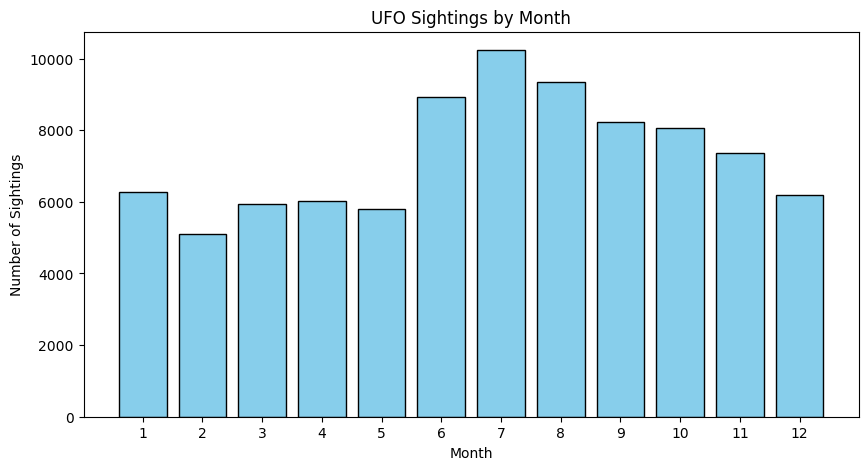

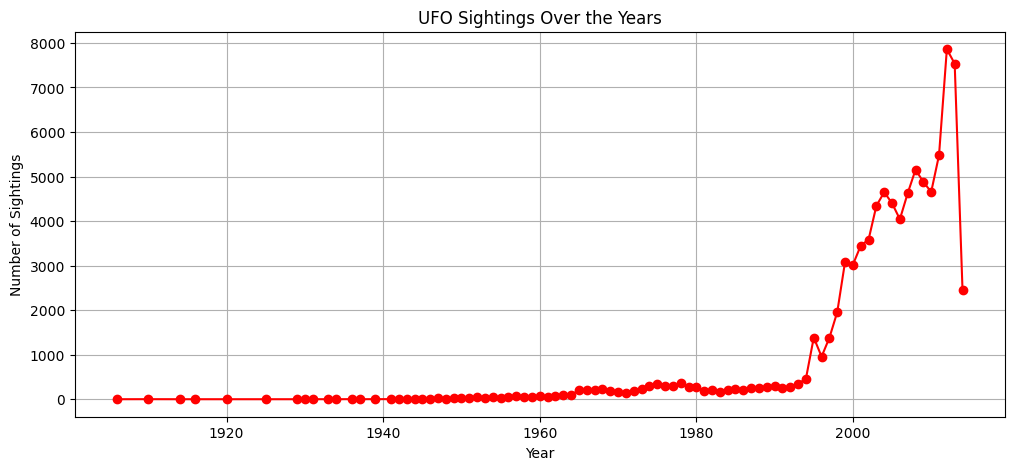

📊 Additional UFO Statistics:
🔹 Total UFO Sightings: 87459
🔹 First Recorded Sighting: 1906-11-11 00:00:00
🔹 Most Common UFO Shape: light


In [9]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Extract Year and Month
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

# Drop rows where year is NaN (e.g., if datetime conversion failed)
df = df.dropna(subset=['year'])

## 🔹 1. Monthly UFO Sightings
monthly_counts = df['month'].value_counts().sort_index()

# Plot monthly occurrences
plt.figure(figsize=(10,5))
plt.bar(monthly_counts.index, monthly_counts.values, color='skyblue', edgecolor='black')
plt.xlabel("Month")
plt.ylabel("Number of Sightings")
plt.title("UFO Sightings by Month")
plt.xticks(range(1, 13))
plt.show()


## 🔹 2. Yearly UFO Sightings Trend
yearly_counts = df['year'].value_counts().sort_index()

# Plot yearly trend
plt.figure(figsize=(12,5))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='red')
plt.xlabel("Year")
plt.ylabel("Number of Sightings")
plt.title("UFO Sightings Over the Years")
plt.grid(True)
plt.show()


## 🔹 3. Additional Insights
print("📊 Additional UFO Statistics:")
print(f"🔹 Total UFO Sightings: {len(df)}")
print(f"🔹 First Recorded Sighting: {df['datetime'].min()}")
print(f"🔹 Most Common UFO Shape: {df['shape'].mode()[0]}")
